In [5]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns

newdf = pd.read_excel('Volve production data.xlsx')

In [6]:
#Roundinf off the data to the nearest integer
newdf = np.round(newdf)

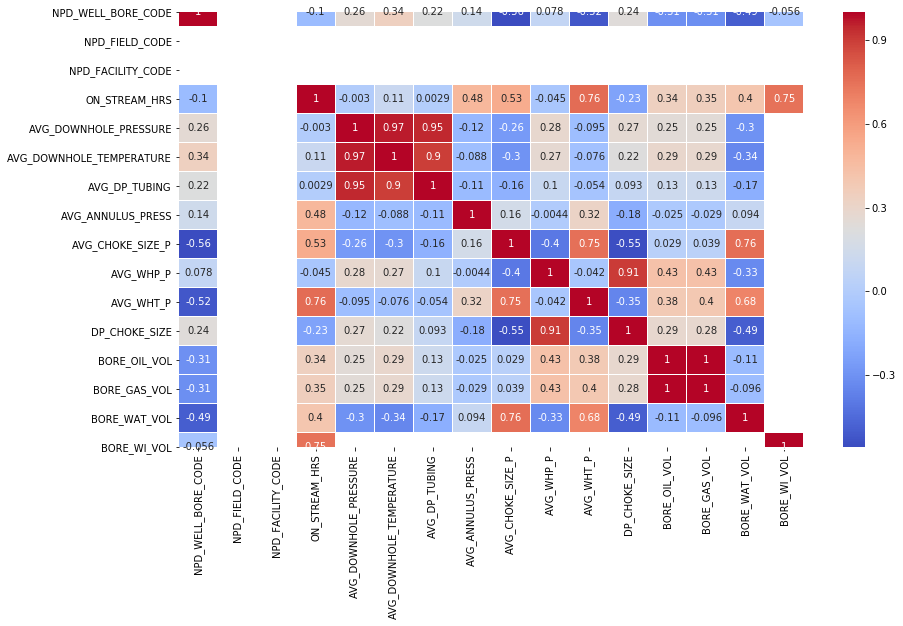

In [7]:
plt.figure(figsize=(14,8))
sns.heatmap(newdf.corr(), annot = True, cmap='coolwarm',linewidths=.1) 
#After observing below matrix we observe the our dependent varible is not/least related with fbs, chol, trestbps, restecg as they lies between [0.2, -0.2].
#So, we can remove those varible from the dataset

In [3]:
#Data is highly skewed and depends on the well,hence i have used padding to fill the missing values 
newdf['ON_STREAM_HRS'] = newdf['ON_STREAM_HRS'].fillna(method='pad')

newdf['AVG_DOWNHOLE_PRESSURE'] = newdf['AVG_DOWNHOLE_PRESSURE'].fillna(method='pad')

newdf['AVG_DOWNHOLE_TEMPERATURE'] = newdf['AVG_DOWNHOLE_TEMPERATURE'].fillna(method='pad')

newdf['AVG_DP_TUBING'] = newdf['AVG_DP_TUBING'].fillna(method='pad')

newdf['AVG_ANNULUS_PRESS'] = newdf['AVG_ANNULUS_PRESS'].fillna(method='pad')

newdf['AVG_CHOKE_SIZE_P'] = newdf['AVG_CHOKE_SIZE_P'].fillna(method='pad')

newdf['AVG_WHP_P'] = newdf['AVG_WHP_P'].fillna(method='pad')

newdf['AVG_WHT_P'] = newdf['AVG_WHT_P'].fillna(method='pad')

newdf['DP_CHOKE_SIZE'] = newdf['DP_CHOKE_SIZE'].fillna(method='pad')

newdf['BORE_OIL_VOL'] = newdf['BORE_OIL_VOL'].fillna(method='pad')

newdf['BORE_GAS_VOL'] = newdf['BORE_GAS_VOL'].fillna(method='pad')

newdf['BORE_WAT_VOL'] = newdf['BORE_WAT_VOL'].fillna(method='pad')


In [4]:
#Carrying out dimensionality reduction on the original dataframe
#Dropping unnecessary features: WELL_BORE_CODE, NPD_WELL_BORE_NAME, NPD_FIELD_NAME, NPD_FIELD_CODE,NPD_FACILITY_CODE,NPD_FACILITY_NAME

to_drop = ["WELL_BORE_CODE", "NPD_WELL_BORE_NAME", "NPD_FIELD_NAME", "NPD_FIELD_CODE", "NPD_FACILITY_CODE", "NPD_FACILITY_NAME","AVG_DOWNHOLE_PRESSURE", "AVG_DP_TUBING","BORE_WI_VOL","AVG_CHOKE_UOM","FLOW_KIND","WELL_TYPE","BORE_GAS_VOL"]
newdf = newdf.drop(to_drop, axis=1)
#print(newdf.info())

In [5]:
#Scaling dataset to remove difference in distributions within columns

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

newdf[['ON_STREAM_HRS','AVG_DOWNHOLE_TEMPERATURE','AVG_ANNULUS_PRESS','AVG_CHOKE_SIZE_P','AVG_WHP_P','AVG_WHT_P']] = scaler.fit_transform(newdf[['ON_STREAM_HRS', 'AVG_DOWNHOLE_TEMPERATURE','AVG_ANNULUS_PRESS', 'AVG_CHOKE_SIZE_P','AVG_WHP_P', 'AVG_WHT_P']])


#Taking the data of wells 2 to 4 since they were the ones with the east number of missing values
fdf = newdf.loc[746 : 8022]

X = fdf.drop(['BORE_OIL_VOL'],axis=1)
y= fdf[['BORE_OIL_VOL','NPD_WELL_BORE_CODE']]

#Applying Linear Regression

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3, random_state=42)

reg_all = LinearRegression()

In [6]:
x_train_final = X_train.drop(['DATEPRD','NPD_WELL_BORE_CODE'],axis = 1)
x_test_final = X_test.drop(['DATEPRD',"NPD_WELL_BORE_CODE"],axis = 1)

In [7]:
y_test_final = y_test['BORE_OIL_VOL']
y_train_final = y_train['BORE_OIL_VOL']

In [8]:
X = fdf.drop(['DATEPRD','BORE_OIL_VOL'],axis=1).values
y= fdf['BORE_OIL_VOL']

In [28]:
x_train_final

ON_STREAM_HRS  AVG_DOWNHOLE_TEMPERATURE  AVG_ANNULUS_PRESS  \
3374           0.96                  0.000000           0.433333   
3760           0.96                  0.000000           0.500000   
2900           0.96                  0.000000           0.766667   
2090           0.96                  0.972477           0.400000   
7782           0.96                  0.917431           0.466667   
...             ...                       ...                ...   
5937           0.96                  0.972477           0.000000   
5972           0.96                  0.972477           0.000000   
6136           0.92                  0.954128           0.000000   
1606           0.96                  0.972477           0.366667   
8016           0.00                  0.000000           0.366667   

      AVG_CHOKE_SIZE_P  AVG_WHP_P  AVG_WHT_P  DP_CHOKE_SIZE  BORE_WAT_VOL  
3374              1.00   0.248175   0.978723            5.0        4663.0  
3760              1.00   0.240876   0.968085            4.0        4630.0  
2900              0.56   0.350365   0.936170           16.0        3784.0  
2090              0.50   0.605839   0.840426           49.0           7.0  
7782              0.94   0.211679   0.925532            2.0        3346.0  
...                ...        ...        ...            ...           ...  
5937              0.62   0.335766   0.968085           13.0        3374.0  
5972              1.00   0.299270   0.957447            9.0        3359.0  
6136              0.57   0.306569   0.946809           12.0        4301.0  
1606              1.00   0.233577   0.861702            5.0        2145.0  
8016              0.01   0.080292   0.000000            9.0           0.0  

[5093 rows x 8 columns]

In [9]:
reg_all.fit(x_train_final, y_train_final)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [10]:
y_pred = reg_all.predict(x_test_final)

In [11]:
print("The R2 value for linear regression for oil volume production is", reg_all.score(x_test_final, y_test_final))

The R2 value for linear regression for oil volume production is 0.5542109655694217


In [27]:
importance = reg_all.coef_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 1338.07639
Feature: 1, Score: 280.89200
Feature: 2, Score: -1194.43707
Feature: 3, Score: 48.02134
Feature: 4, Score: 506.57085
Feature: 5, Score: 2572.30477
Feature: 6, Score: 13.05541
Feature: 7, Score: -0.40973


In [29]:
reg_all.coef_

array([ 1.33807639e+03,  2.80892004e+02, -1.19443707e+03,  4.80213352e+01,
        5.06570847e+02,  2.57230477e+03,  1.30554129e+01, -4.09730530e-01])

In [30]:
reg_all.intercept_

-1110.702698660835

### Correlation from Linear Regression

In [42]:
print("The linear model is: BORE_OIL_VOL = {:.5} + {:.5}*ON_STREAM_HRS + {:.5}*AVG_DOWNHOLE_TEMPERATURE  {:.5}*AVG_ANNULUS_PRESS + {:.5}*AVG_CHOKE_SIZE_P + {:.5}*AVG_WHP_P + {:.5}*AVG_WHT_P + {:.5}*DP_CHOKE_SIZE {:.5}*BORE_WAT_".format(reg_all.intercept_, reg_all.coef_[0], reg_all.coef_[1], reg_all.coef_[2],reg_all.coef_[3], reg_all.coef_[4], reg_all.coef_[5], reg_all.coef_[6], reg_all.coef_[7]))

The linear model is: BORE_OIL_VOL = -1110.7 + 1338.1*ON_STREAM_HRS + 280.89*AVG_DOWNHOLE_TEMPERATURE  -1194.4*AVG_ANNULUS_PRESS + 48.021*AVG_CHOKE_SIZE_P + 506.57*AVG_WHP_P + 2572.3*AVG_WHT_P + 13.055*DP_CHOKE_SIZE -0.40973*BORE_WAT_


### Polynomial

In [49]:
# Applying Polynomisl Regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(x_train_final)
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y_train_final)
x_pol_test = poly_reg.fit_transform(x_test_final)
X_poly.shape[1]



#print("The R2 value for Ridge regression for oil volume production is",ridge.score(x_test_final, y_test_final))

495

In [62]:
a =np.array(poly_reg.get_feature_names(['ON_STREAM_HRS','AVG_DOWNHOLE_TEMPERATURE', 'AVG_ANNULUS_PRESS', 'AVG_CHOKE_SIZE_P','AVG_WHP_P','AVG_WHT_P','DP_CHOKE_SIZE' ,'BORE_WAT_VOL']))

In [63]:
print(len(a))

495


In [64]:
b = np.array(lin_reg.coef_)

In [65]:
Correlation_Poly = pd.DataFrame({'Coefficients':b, 'Feature Name':a})

In [67]:
Correlation_Poly.head(200)

Coefficients                                Feature Name
0       -1.151191                                           1
1       80.640127                               ON_STREAM_HRS
2      -23.485490                    AVG_DOWNHOLE_TEMPERATURE
3      -74.682200                           AVG_ANNULUS_PRESS
4       67.193996                            AVG_CHOKE_SIZE_P
..            ...                                         ...
195     48.134880                 ON_STREAM_HRS^2 AVG_WHT_P^2
196     93.225097     ON_STREAM_HRS^2 AVG_WHT_P DP_CHOKE_SIZE
197      5.080251      ON_STREAM_HRS^2 AVG_WHT_P BORE_WAT_VOL
198      0.417200             ON_STREAM_HRS^2 DP_CHOKE_SIZE^2
199      0.061480  ON_STREAM_HRS^2 DP_CHOKE_SIZE BORE_WAT_VOL

[200 rows x 2 columns]

In [15]:
# get importance
importance = lin_reg.coef_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))


Feature: 0, Score: -1.15119
Feature: 1, Score: 80.64013
Feature: 2, Score: -23.48549
Feature: 3, Score: -74.68220
Feature: 4, Score: 67.19400
Feature: 5, Score: 28.64442
Feature: 6, Score: 40.22011
Feature: 7, Score: -14.87197
Feature: 8, Score: 18.81784
Feature: 9, Score: 88.17846
Feature: 10, Score: 53.36166
Feature: 11, Score: 20.59159
Feature: 12, Score: 82.78886
Feature: 13, Score: 13.64386
Feature: 14, Score: 57.75257
Feature: 15, Score: 11.83196
Feature: 16, Score: -11.32634
Feature: 17, Score: -21.13204
Feature: 18, Score: -26.06397
Feature: 19, Score: 24.60343
Feature: 20, Score: 4.50567
Feature: 21, Score: -15.67679
Feature: 22, Score: 66.02287
Feature: 23, Score: -19.15150
Feature: 24, Score: -71.87574
Feature: 25, Score: 24.86856
Feature: 26, Score: -2.70355
Feature: 27, Score: -9.95277
Feature: 28, Score: 50.90291
Feature: 29, Score: -10.95098
Feature: 30, Score: 64.34238
Feature: 31, Score: 10.73963
Feature: 32, Score: 61.81412
Feature: 33, Score: 42.81506
Feature: 34, Sc

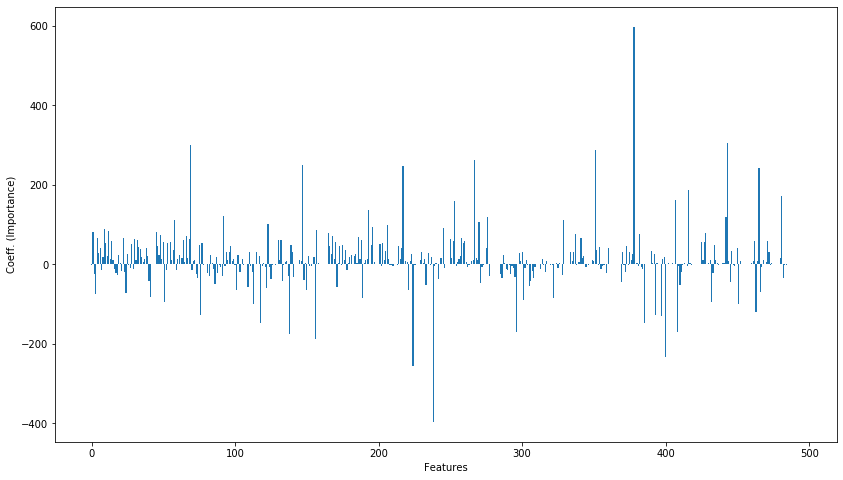

In [16]:
# plot feature importance
plt.figure(figsize = (14,8))
plt.xlabel("Features")
plt.ylabel("Coeff. (Importance)")
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [17]:
y_pred = lin_reg.predict(x_pol_test)

In [18]:
print("The R2 value for Polynomial regression(4th order) for oil volume production is",lin_reg.score(x_pol_test, y_test_final))

The R2 value for Polynomial regression(4th order) for oil volume production is 0.9673070832020679


In [19]:
df = pd.DataFrame({'Real Values':y_test_final, 'Predicted Values':y_pred})
df

Real Values  Predicted Values
6805        643.0        513.246127
6756        613.0        376.370945
5221       4634.0       4390.115907
4435        688.0        670.462553
5261       3571.0       3626.756712
...           ...               ...
6803        938.0        701.256185
5512       4326.0       3609.583938
2494       4199.0       4657.985393
7307        311.0        485.010875
7161        107.0        239.526298

[2184 rows x 2 columns]

In [20]:
X_test.groupby(['NPD_WELL_BORE_CODE']).agg({"DATEPRD":"count"})

DATEPRD
NPD_WELL_BORE_CODE         
5351                    910
5599                    914
7078                    360

## Actual V/S Model Prediction plot for Well No.- 5599

### Linear Regression

The R2 value for linear regression for oil volume production in well 5599 is 0.5500832938872038


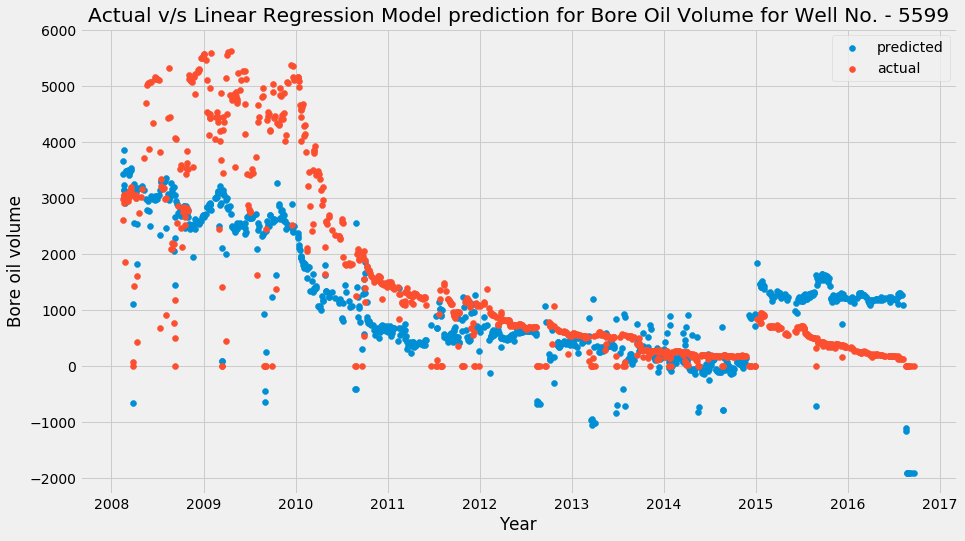

In [43]:
X_test_5599 = X_test[X_test["NPD_WELL_BORE_CODE"] == 5599]

y_test_5599 = y_test[y_test["NPD_WELL_BORE_CODE"] == 5599]

x_test_5599final = X_test_5599.drop(['DATEPRD',"NPD_WELL_BORE_CODE"],axis = 1)


y_pred = reg_all.predict(x_test_5599final)
plt.style.use('fivethirtyeight')
plt.figure(figsize = (14,8))
plt.scatter(X_test_5599["DATEPRD"].tolist(),y_pred,label='predicted')
plt.scatter(X_test_5599["DATEPRD"].tolist(),y_test_5599['BORE_OIL_VOL'],label='actual')
plt.legend()
plt.xlabel("Year")
plt.ylabel("Bore oil volume")
plt.title('Actual v/s Linear Regression Model prediction for Bore Oil Volume for Well No. - 5599')

y_test_5599_final = y_test_5599['BORE_OIL_VOL']
print("The R2 value for linear regression for oil volume production in well 5599 is", reg_all.score(x_test_5599final,y_test_5599_final ))


In [44]:
print("The linear model is: BORE_OIL_VOL = {:.5} + {:.5}*ON_STREAM_HRS + {:.5}*AVG_DOWNHOLE_TEMPERATURE  {:.5}*AVG_ANNULUS_PRESS + {:.5}*AVG_CHOKE_SIZE_P + {:.5}*AVG_WHP_P + {:.5}*AVG_WHT_P + {:.5}*DP_CHOKE_SIZE {:.5}*BORE_WAT_".format(reg_all.intercept_, reg_all.coef_[0], reg_all.coef_[1], reg_all.coef_[2],reg_all.coef_[3], reg_all.coef_[4], reg_all.coef_[5], reg_all.coef_[6], reg_all.coef_[7]))

The linear model is: BORE_OIL_VOL = -1110.7 + 1338.1*ON_STREAM_HRS + 280.89*AVG_DOWNHOLE_TEMPERATURE  -1194.4*AVG_ANNULUS_PRESS + 48.021*AVG_CHOKE_SIZE_P + 506.57*AVG_WHP_P + 2572.3*AVG_WHT_P + 13.055*DP_CHOKE_SIZE -0.40973*BORE_WAT_


The R2 value for linear regression for oil volume production in well 5599 is 0.5500832938872038
The R2 value for Polynomial regression(Degree - 4) for oil volume production in well 5599 is 0.9742735914308794


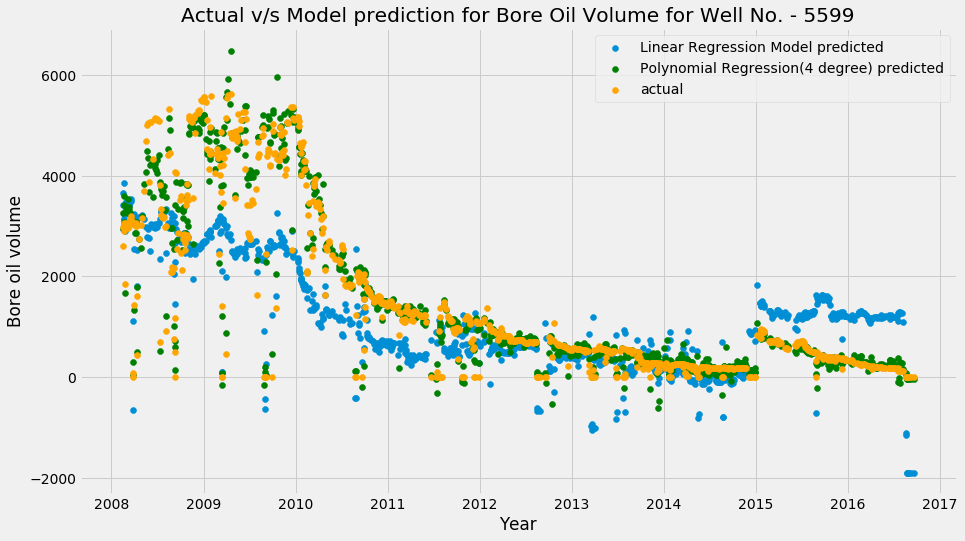

In [22]:
X_test_5599 = X_test[X_test["NPD_WELL_BORE_CODE"] == 5599]

y_test_5599 = y_test[y_test["NPD_WELL_BORE_CODE"] == 5599]

x_test_5599final = X_test_5599.drop(['DATEPRD',"NPD_WELL_BORE_CODE"],axis = 1)

y_linear = reg_all.predict(x_test_5599final)


x_pol_test_5599 = poly_reg.fit_transform(x_test_5599final)
y_poly = lin_reg.predict(x_pol_test_5599)

plt.style.use('fivethirtyeight')
plt.figure(figsize = (14,8))
plt.scatter(X_test_5599["DATEPRD"].tolist(),y_linear,label='Linear Regression Model predicted')
plt.scatter(X_test_5599["DATEPRD"].tolist(),y_poly,label='Polynomial Regression(4 degree) predicted', color = 'green')
plt.scatter(X_test_5599["DATEPRD"].tolist(),y_test_5599['BORE_OIL_VOL'],label='actual', color = 'orange')
plt.legend()
plt.xlabel("Year")
plt.ylabel("Bore oil volume")
plt.title('Actual v/s Model prediction for Bore Oil Volume for Well No. - 5599')

print("The R2 value for linear regression for oil volume production in well 5599 is", reg_all.score(x_test_5599final,y_test_5599_final ))

print("The R2 value for Polynomial regression(Degree - 4) for oil volume production in well 5599 is", lin_reg.score(x_pol_test_5599,y_test_5599_final ))



## Actual V/S Model Prediction plot for Well No.- 5351

### Linear Regression

The R2 value for linear regression for oil volume production is 0.6750225210254925


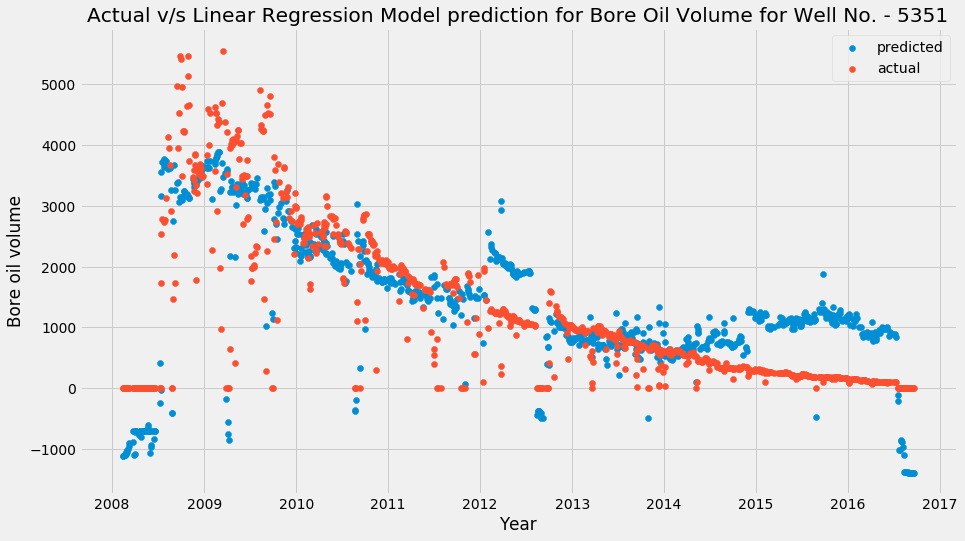

In [23]:
X_test_5351 = X_test[X_test["NPD_WELL_BORE_CODE"] == 5351]

y_test_5351 = y_test[y_test["NPD_WELL_BORE_CODE"] == 5351]

x_test_5351final = X_test_5351.drop(['DATEPRD',"NPD_WELL_BORE_CODE"],axis = 1)


y_pred = reg_all.predict(x_test_5351final)
plt.style.use('fivethirtyeight')
plt.figure(figsize = (14,8))
plt.scatter(X_test_5351["DATEPRD"].tolist(),y_pred,label='predicted')
plt.scatter(X_test_5351["DATEPRD"].tolist(),y_test_5351['BORE_OIL_VOL'],label='actual')
plt.legend()
plt.xlabel("Year")
plt.ylabel("Bore oil volume")
plt.title('Actual v/s Linear Regression Model prediction for Bore Oil Volume for Well No. - 5351')

y_test_5351_final = y_test_5351['BORE_OIL_VOL']
print("The R2 value for linear regression for oil volume production is", reg_all.score(x_test_5351final,y_test_5351_final ))


The R2 value for linear regression for oil volume production in well 5351 is 0.6750225210254925
The R2 value for Polynomial regression(Degree - 4) for oil volume production in well 5351 is 0.9643214901026707


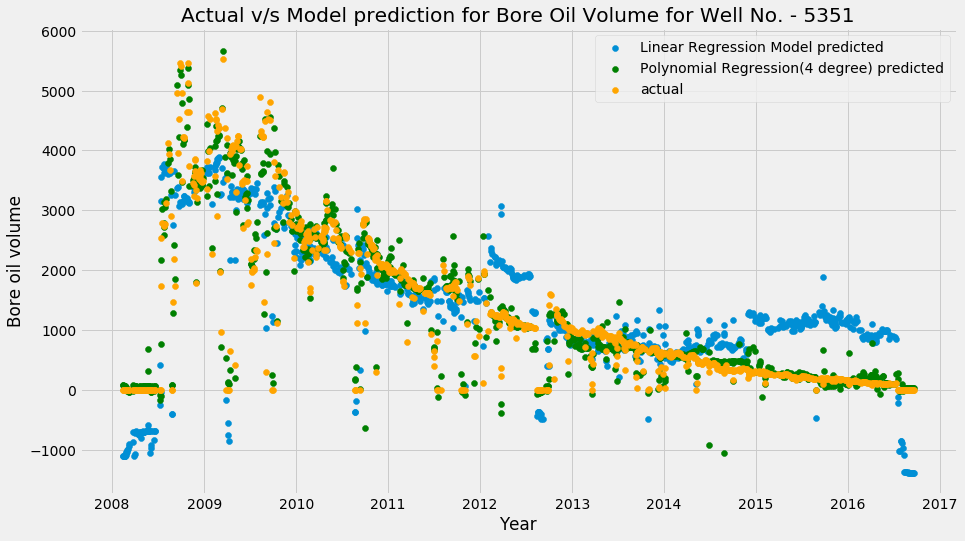

In [24]:
X_test_5351 = X_test[X_test["NPD_WELL_BORE_CODE"] == 5351]

y_test_5351 = y_test[y_test["NPD_WELL_BORE_CODE"] == 5351]

x_test_5351final = X_test_5351.drop(['DATEPRD',"NPD_WELL_BORE_CODE"],axis = 1)

y_linear = reg_all.predict(x_test_5351final)


x_pol_test_5351 = poly_reg.fit_transform(x_test_5351final)
y_poly = lin_reg.predict(x_pol_test_5351)

plt.style.use('fivethirtyeight')
plt.figure(figsize = (14,8))
plt.scatter(X_test_5351["DATEPRD"].tolist(),y_linear,label='Linear Regression Model predicted')
plt.scatter(X_test_5351["DATEPRD"].tolist(),y_poly,label='Polynomial Regression(4 degree) predicted', color = 'green')
plt.scatter(X_test_5351["DATEPRD"].tolist(),y_test_5351['BORE_OIL_VOL'],label='actual', color = 'orange')
plt.legend()
plt.xlabel("Year")
plt.ylabel("Bore oil volume")
plt.title('Actual v/s Model prediction for Bore Oil Volume for Well No. - 5351')

print("The R2 value for linear regression for oil volume production in well 5351 is", reg_all.score(x_test_5351final,y_test_5351_final ))

print("The R2 value for Polynomial regression(Degree - 4) for oil volume production in well 5351 is", lin_reg.score(x_pol_test_5351,y_test_5351_final ))


## Actual V/S Model Prediction plot for Well No.- 7078

### Linear Regression

The R2 value for linear regression for oil volume production in well 7078 is -3.0140537511264807


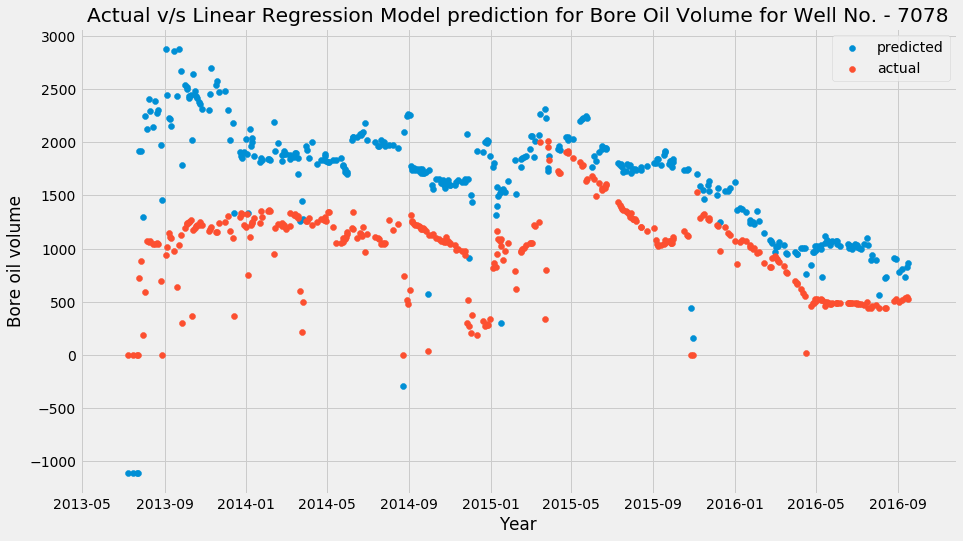

In [25]:
X_test_7078 = X_test[X_test["NPD_WELL_BORE_CODE"] == 7078]

y_test_7078 = y_test[y_test["NPD_WELL_BORE_CODE"] == 7078]

x_test_7078final = X_test_7078.drop(['DATEPRD',"NPD_WELL_BORE_CODE"],axis = 1)


y_pred = reg_all.predict(x_test_7078final)
plt.style.use('fivethirtyeight')
plt.figure(figsize = (14,8))
plt.scatter(X_test_7078["DATEPRD"].tolist(),y_pred,label='predicted')
plt.scatter(X_test_7078["DATEPRD"].tolist(),y_test_7078['BORE_OIL_VOL'],label='actual')
plt.legend()
plt.xlabel("Year")
plt.ylabel("Bore oil volume")
plt.title('Actual v/s Linear Regression Model prediction for Bore Oil Volume for Well No. - 7078')

y_test_7078_final = y_test_7078['BORE_OIL_VOL']
print("The R2 value for linear regression for oil volume production in well 7078 is", reg_all.score(x_test_7078final,y_test_7078_final ))


The R2 value for linear regression for oil volume production in well 7078 is -3.0140537511264807
The R2 value for Polynomial regression(Degree - 4) for oil volume production in well 7078 is 0.7084983033730887


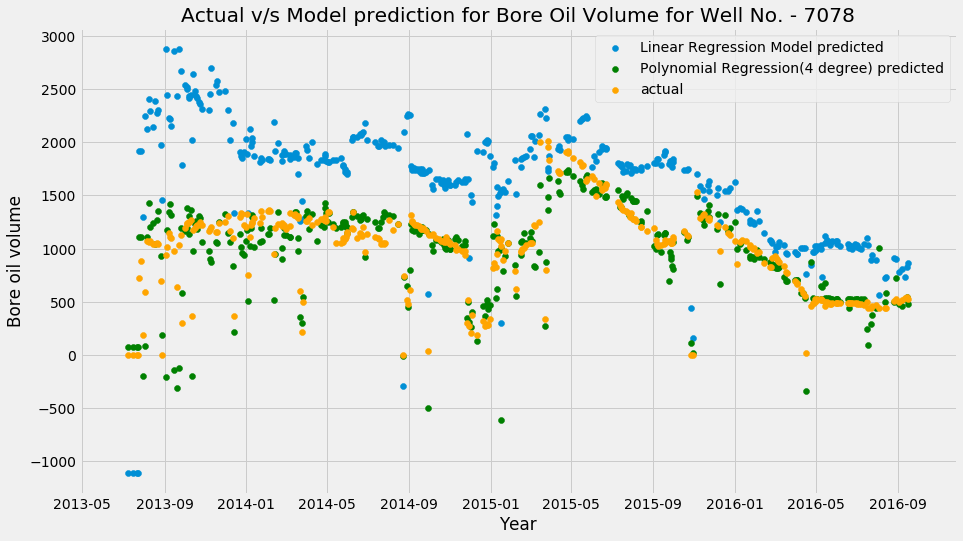

In [26]:
X_test_7078 = X_test[X_test["NPD_WELL_BORE_CODE"] == 7078]

y_test_7078 = y_test[y_test["NPD_WELL_BORE_CODE"] == 7078]

x_test_7078final = X_test_7078.drop(['DATEPRD',"NPD_WELL_BORE_CODE"],axis = 1)

y_linear = reg_all.predict(x_test_7078final)


x_pol_test_7078 = poly_reg.fit_transform(x_test_7078final)
y_poly = lin_reg.predict(x_pol_test_7078)

plt.style.use('fivethirtyeight')
plt.figure(figsize = (14,8))
plt.scatter(X_test_7078["DATEPRD"].tolist(),y_linear,label='Linear Regression Model predicted')
plt.scatter(X_test_7078["DATEPRD"].tolist(),y_poly,label='Polynomial Regression(4 degree) predicted', color = 'green')
plt.scatter(X_test_7078["DATEPRD"].tolist(),y_test_7078['BORE_OIL_VOL'],label='actual', color = 'orange')
plt.legend()
plt.xlabel("Year")
plt.ylabel("Bore oil volume")
plt.title('Actual v/s Model prediction for Bore Oil Volume for Well No. - 7078')

print("The R2 value for linear regression for oil volume production in well 7078 is", reg_all.score(x_test_7078final,y_test_7078_final ))

print("The R2 value for Polynomial regression(Degree - 4) for oil volume production in well 7078 is", lin_reg.score(x_pol_test_7078,y_test_7078_final ))
